In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import os, os.path

from datetime import date
import datetime
import time

# from pprint import pprint
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import io



from pylab import rcParams

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path

# Functions

In [23]:
def add_human_start_time(HDF):
    HDF.system_start_time = HDF.system_start_time / 1000
    time_array = HDF["system_start_time"].values.copy()
    human_time_array = [time.strftime('%Y-%m-%d', time.localtime(x)) for x in time_array]
    HDF["human_system_start_time"] = human_time_array

    if type(HDF["human_system_start_time"]==str):
        HDF['human_system_start_time'] = pd.to_datetime(HDF['human_system_start_time'])
    return(HDF)

# Set Directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/Supriya/Shapefiles_landsatcode_NDVIAnalysis/"

# Read Data

In [3]:
buffer_region_reduced = pd.read_csv(data_dir + "buffer_region_reduced_10cloud.csv")
buffer_region_reduced.head(5)

,system_start_time,image_year,doy,NDVI
0,1.264012e+12,2010.0,19.0,0.134250
1,1.264789e+12,2010.0,28.0,0.074665
2,1.266171e+12,2010.0,44.0,0.085049
3,1.266777e+12,2010.0,51.0,0.213128
4,1.267554e+12,2010.0,60.0,NaN


In [11]:
# drop NAs

buffer_region_reduced.dropna(subset=['NDVI'], inplace=True)
buffer_region_reduced.reset_index(drop=True, inplace=True)

buffer_region_reduced.sort_values(by='system_start_time', inplace=True)
buffer_region_reduced.head(5)

,system_start_time,image_year,doy,NDVI
0,1.264012e+12,2010.0,19.0,0.134250
1,1.264789e+12,2010.0,28.0,0.074665
2,1.266171e+12,2010.0,44.0,0.085049
3,1.266777e+12,2010.0,51.0,0.213128
4,1.268159e+12,2010.0,67.0,0.242836


In [24]:
buffer_region_reduced = add_human_start_time(buffer_region_reduced)
buffer_region_reduced.head(2)

In [39]:
# Plot params

import matplotlib.pylab as pylab
size = 15
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}


#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'serif')
# plt.rcParams['xtick.bottom'] = False
# plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

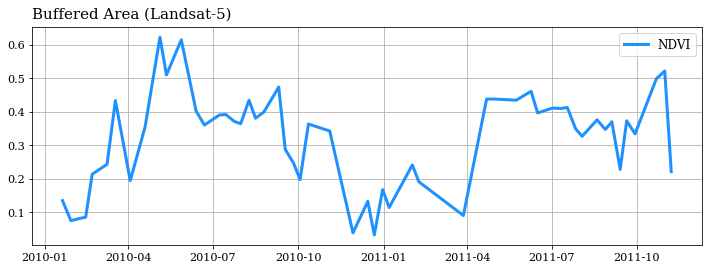

In [42]:
fig, ax = plt.subplots();
fig.set_size_inches(12, 4)

ax.plot(buffer_region_reduced["human_system_start_time"].values,
        buffer_region_reduced["NDVI"].values,
        linewidth = 3,
        c ='dodgerblue', label = 'NDVI')

################################################
#
# Set labels and ticks
#
plt.title('Buffered Area (Landsat-5)', loc='left')

# ax.set_xlabel('time'); # , labelpad = 15
# ax.set_ylabel(r'NDVI'); # , labelpad = 15
ax.tick_params(axis = 'y', which = 'major')
ax.tick_params(axis = 'x', which = 'major')

# plt.xlim([300, 800])

ax.grid(True);
ax.legend(loc = "upper right");

plot_dir = data_dir
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "NDVI_buffer.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)



# Mosaiced data

In [53]:
buffer_region_reduced_Mosaic = pd.read_csv(data_dir + "buffer_region_reduced_10cloud_Mosaic.csv")

# drop NAs
buffer_region_reduced_Mosaic.dropna(subset=['NDVI'], inplace=True)
buffer_region_reduced_Mosaic.reset_index(drop=True, inplace=True)
buffer_region_reduced_Mosaic.sort_values(by='system_start_time', inplace=True)
buffer_region_reduced_Mosaic = add_human_start_time(buffer_region_reduced_Mosaic)

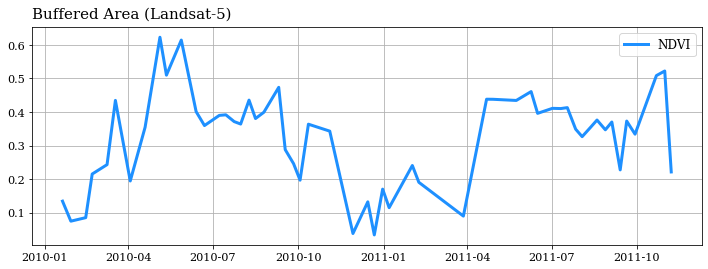

In [54]:
fig, ax = plt.subplots();
fig.set_size_inches(12, 4)

ax.plot(buffer_region_reduced_Mosaic["human_system_start_time"].values,
        buffer_region_reduced_Mosaic["NDVI"].values,
        linewidth = 3,
        c ='dodgerblue', label = 'NDVI')

################################################
#
# Set labels and ticks
#
plt.title('Buffered Area (Landsat-5)', loc='left')

# ax.set_xlabel('time'); # , labelpad = 15
# ax.set_ylabel(r'NDVI'); # , labelpad = 15
ax.tick_params(axis = 'y', which = 'major')
ax.tick_params(axis = 'x', which = 'major')

# plt.xlim([300, 800])

ax.grid(True);
ax.legend(loc = "upper right");

plot_dir = data_dir
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "NDVI_buffer_Mosaic.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)